In [45]:
import snowflake.connector
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

In [46]:
conn = snowflake.connector.connect(
    user='dataproject',
    password='Data@engg1',
    account='SFZDDUF-PL64637',
    warehouse='COMPUTE_WH',
    database='ANALYSIS',
    schema='RAW',
    )

cur = conn.cursor()


In [49]:
cur.execute('select * from dataset limit 100')
data = cur.fetchall()
data = pd.DataFrame(data)
data

data = pd.read_sql(sql='select * from dataset limit 100', con=conn)
data

C:\Users\cshah\AppData\Local\Temp\ipykernel_4704\2615334233.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(sql='select * from dataset limit 100', con=conn)


,ID,FULL_NAME,EMAIL,GENDER,IP_ADDRESS,PHONE_NO,CREATED_AT,VEHICLE_MAKER,VEHICLE_MODEL,VEHICLE_YEAR,...,PERSONALITY_TYPE,SHOPPING_HABITS,COMMUNICATION_STYLE,DECISION_MAKING_PROCESS,LEARNING_PREFERENCE,PERSONALITY_TRAIT,SHOPPING_PREFERENCE,EXERCISE_FREQUENCY,SOCIAL_MEDIA_USAGE,SLEEP_PATTERN
0,1,Deane Geale,dgeale0@elegantthemes.com,Agender,211.73.18.109,190-229-6454,2023-09-14,Chrysler,PT Cruiser,2002,...,analytical,planned,assertive,impulsive,visual,adventurous,in-store,never,rare,night owl
1,2,Hunfredo Ertelt,hertelt1@blogspot.com,Male,179.49.95.227,881-146-0928,2024-04-09,Mitsubishi,Chariot,1995,...,extroverted,in-store,passive,emotional,multimodal,cautious,online,weekly,rare,night owl
2,3,Maureen Brocklebank,mbrocklebank2@addtoany.com,Female,200.219.20.118,869-442-9552,2023-08-28,Toyota,RAV4,2012,...,introverted,in-store,collaborative,logical,multimodal,adventurous,in-store,weekly,frequent,early bird
3,4,Alfie Campana,acampana3@seesaa.net,Polygender,108.166.76.212,504-173-9321,2024-01-01,Acura,TSX,2009,...,creative,planned,collaborative,emotional,reading/writing,outgoing,none,never,occasional,irregular
4,5,Mylo Mewes,mmewes4@businessweek.com,Male,127.159.17.140,318-685-4221,2024-05-09,Dodge,Ram 2500,1999,...,analytical,both,collaborative,emotional,visual,cautious,both,daily,rare,night owl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Andonis Tocque,atocque2n@paypal.com,Male,201.32.96.52,635-169-2346,2024-01-05,Mazda,B-Series,2007,...,creative,impulse,direct,emotional,auditory,outgoing,in-store,never,frequent,irregular
96,97,Melisse Trodd,mtrodd2o@kickstarter.com,Female,172.71.28.100,953-448-2607,2024-05-10,BMW,X6,2008,...,extroverted,planned,indirect,emotional,kinesthetic,cautious,online,monthly,rare,early bird
97,98,Cathi Manser,cmanser2p@mysql.com,Female,75.167.81.81,624-517-3861,2024-04-29,BMW,545,2004,...,introverted,in-store,direct,emotional,visual,outgoing,both,monthly,rare,night owl
98,99,Lyndell Perche,lperche2q@ox.ac.uk,Female,195.92.60.217,872-592-6283,2024-05-22,Jeep,Wrangler,1992,...,analytical,both,indirect,emotional,visual,spontaneous,in-store,never,rare,average


In [12]:
cur.execute('select * from dataset limit 100')


In [52]:
#SECOND ACTIVITY 
#PERSONALITY TYPES
# analytical
# extroverted
# introverted
# creative
# organized

# SHOPPING PREFERENCE
# in-store
# online
# none
# both

# EXERCISE FREQUENCY
# never
# weekly
# daily
# monthly
# rarely





query = '''
SELECT 
    id,
    -- full_name,
    CASE personality_type
        WHEN 'analytical' THEN 1
        WHEN 'creative' THEN 2
        WHEN 'extroverted' THEN 3
        WHEN 'introverted' THEN 4
        WHEN 'organized' THEN 5
        ELSE 0
    END AS personality_type_code,
    CASE shopping_habits
        WHEN 'in-store' THEN 1
        WHEN 'online' THEN 2
        WHEN 'both' THEN 3
        WHEN 'none' THEN 4

        ELSE 0
    END AS shopping_habits_code,
    CASE exercise_frequency
        WHEN 'never' THEN 1
        WHEN 'rarely' THEN 2
        WHEN 'daily' THEN 3
        WHEN 'weekly' THEN 4
        WHEN 'monthly' THEN 5
        ELSE 0
    END AS exercise_frequency_code
FROM dataset
'''
data =  pd.read_sql(sql=query,con=conn)
data

C:\Users\cshah\AppData\Local\Temp\ipykernel_4704\558847213.py:56: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data =  pd.read_sql(sql=query,con=conn)


,ID,PERSONALITY_TYPE_CODE,SHOPPING_HABITS_CODE,EXERCISE_FREQUENCY_CODE
0,1,1,0,1
1,2,3,1,4
2,3,4,1,4
3,4,2,0,1
4,5,1,3,3
...,...,...,...,...
995,996,4,0,2
996,997,2,0,2
997,998,1,3,5
998,999,1,0,5


In [53]:
x = data.iloc[:,[1,2,3]].values
x

array([[1, 0, 1],
       [3, 1, 4],
       [4, 1, 4],
       ...,
       [1, 3, 5],
       [1, 0, 5],
       [3, 1, 1]], dtype=int64)

In [77]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i ,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss

c:\Users\cshah\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cshah\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cshah\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cshah\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

[5422.51,
 3876.572137869175,
 2923.212765839303,
 2350.5930622142423,
 1943.4437837692851,
 1636.2722701432094,
 1387.5354985808262,
 1209.885189233626,
 1109.0461605930805,
 1021.8130809570617]

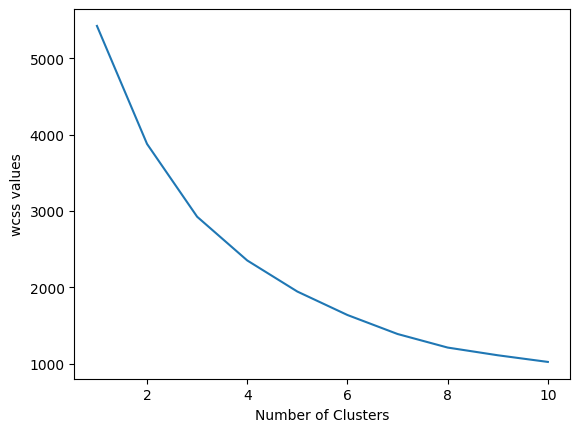

In [78]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss values')
plt.show()

In [84]:
kmeansmodel = KMeans(n_clusters = 9 ,init='k-means++',random_state=0)


In [85]:
y_kmeans = kmeansmodel.fit_predict(x)

c:\Users\cshah\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


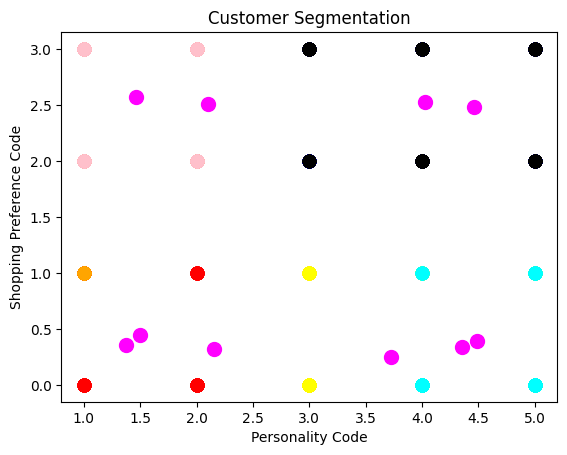

In [86]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans==0,1],s=80,c='red',label='1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans==1,1],s=80,c='blue',label='1')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans==2,1],s=80,c='yellow',label='1')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans==3,1],s=80,c='orange',label='1')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans==4,1],s=80,c='cyan',label='1')
plt.scatter(x[y_kmeans == 5,0],x[y_kmeans==5,1],s=80,c='pink',label='1')
plt.scatter(x[y_kmeans == 6,0],x[y_kmeans==6,1],s=80,c='black',label='1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta',label='centroids')
plt.title('Customer Segmentation')
plt.xlabel('Personality Code')
plt.ylabel('Shopping Preference Code')
plt.show()
